# Curso Computer Vision

<img src="https://yaelmanuel.com/wp-content/uploads/2021/12/platzi-banner-logo-matematicas.png" width="500px">

---

## Creando nuestro propio Detector de Objetos ⚙️🔍

En este lab aprenderás:

* [YOLO](https://www.ultralytics.com/)
* Descargar un dataset, prepararlo, entrenarlo y guardarlo.


### 1) Carga del dataset 🤓

Utilizaremos un conjunto de imágenes de Defectos en Soldaduras industriales proporcionados por el cliente.

In [12]:
!unrar x "defectos_de_soldaduras.rar"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from defectos_de_soldaduras.rar

Creating    defectos_de_soldaduras                                    OK
Extracting  defectos_de_soldaduras/data.yaml                               0%  OK 
Creating    defectos_de_soldaduras/test                               OK
Creating    defectos_de_soldaduras/test/images                        OK
Extracting  defectos_de_soldaduras/test/images/02fd0af7-51ab46bb-c13_jpg.rf.7de08cd3b264d9098d09f5fe6d21c959.jpg       0%  OK 
Extracting  defectos_de_soldaduras/test/images/1aa4b44c-d01b8a11-Hot-crack_jpg.rf.57393ca7936f061ca5991481b2b5c485.jpg       0%  OK 
Extracting  defectos_de_soldaduras/test/images/295992d6-f617b725-c1_png_jpg.rf.5f645e13f1695df588b0644ca9702c43.jpg       0%  OK 
Extracting  defectos_de_soldaduras/test/images/4a05306b-ca866e1f-c12_jpg.rf.c5c926823394e6056b533bedd6e64c99.jpg       0%  OK 
Extracting  defe

### 2) Dependencias 👌

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.9/932.9 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [3]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### 3) Entrenamiento 💪

Cargar un modelo preentrenado

In [4]:
model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 95.1MB/s]


In [5]:
yaml_path = "/content/defectos_de_soldaduras/data.yaml"

#### 📍 Opción 1: Configuración por default

In [ ]:
model.train(
    data=yaml_path,
    epochs=10,
    imgsz=640,
    augment=True,
    )

Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/defectos_de_soldaduras/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 20.3MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/defectos_de_soldaduras/train/labels... 839 images, 0 backgrounds, 0 corrupt: 100%|██████████| 839/839 [00:01<00:00, 693.19it/s]

train: New cache created: /content/defectos_de_soldaduras/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/defectos_de_soldaduras/valid/labels... 176 images, 0 backgrounds, 0 corrupt: 100%|██████████| 176/176 [00:00<00:00, 501.56it/s]

val: New cache created: /content/defectos_de_soldaduras/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.41G      2.139       3.61      1.855         21        640: 100%|██████████| 53/53 [00:16<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.68it/s]

                   all        176        573    0.00794      0.692      0.162     0.0579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       2.8G      2.066      3.046      1.762         15        640: 100%|██████████| 53/53 [00:14<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.62it/s]


                   all        176        573      0.485       0.25      0.142     0.0526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10       2.8G      2.034      2.873      1.718         46        640: 100%|██████████| 53/53 [00:13<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.11it/s]

                   all        176        573      0.373      0.384      0.247      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10       2.8G      1.958      2.723      1.699         32        640: 100%|██████████| 53/53 [00:13<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.03it/s]


                   all        176        573      0.195      0.309      0.208      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       2.8G      1.875      2.552      1.642         15        640: 100%|██████████| 53/53 [00:13<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.77it/s]

                   all        176        573      0.276      0.394      0.238      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10       2.8G      1.806      2.443      1.598         26        640: 100%|██████████| 53/53 [00:14<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.40it/s]


                   all        176        573       0.35      0.429      0.283      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10       2.8G      1.765       2.31      1.555         23        640: 100%|██████████| 53/53 [00:13<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.07it/s]


                   all        176        573      0.443      0.424      0.345      0.175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       2.8G      1.685      2.217      1.521         22        640: 100%|██████████| 53/53 [00:13<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.26it/s]

                   all        176        573      0.508      0.425       0.38      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10       2.8G      1.627      2.121      1.479         26        640: 100%|██████████| 53/53 [00:13<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.23it/s]


                   all        176        573       0.41      0.521      0.396      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10       2.8G      1.568      2.041       1.44         23        640: 100%|██████████| 53/53 [00:14<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.15it/s]

                   all        176        573      0.428       0.52      0.406      0.231



10 epochs completed in 0.047 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.37it/s]


                   all        176        573      0.418       0.51      0.412      0.242
              Bad Weld         87        127      0.388      0.661       0.47      0.281
             Good Weld        119        253      0.502      0.787      0.627      0.385
                Defect         90        193      0.362     0.0829      0.138     0.0587
Speed: 0.3ms preprocess, 10.7ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cbc8c6fb190>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

#### 📍 Opción 2) Patience con Early Stopping

Si no mejora en 5 epochs el loss validation, detiene el entrenamiento.

In [14]:
model.train(
    data=yaml_path,
    epochs=20,
    imgsz=640,
    augment=True,
    patience=5,
    )

Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/defectos_de_soldaduras/data.yaml, epochs=20, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

train: Scanning /content/defectos_de_soldaduras/train/labels... 839 images, 0 backgrounds, 0 corrupt: 100%|██████████| 839/839 [00:00<00:00, 2397.79it/s]

train: New cache created: /content/defectos_de_soldaduras/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/defectos_de_soldaduras/valid/labels... 176 images, 0 backgrounds, 0 corrupt: 100%|██████████| 176/176 [00:00<00:00, 2003.36it/s]

val: New cache created: /content/defectos_de_soldaduras/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.32G      2.071       3.37      1.746         42        640: 100%|██████████| 53/53 [00:17<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.91it/s]

                   all        176        573    0.00826      0.639      0.173     0.0682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       2.7G      1.935      2.743      1.613         28        640: 100%|██████████| 53/53 [00:14<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.55it/s]

                   all        176        573       0.49      0.276      0.138     0.0522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       2.7G      1.932      2.624      1.613         29        640: 100%|██████████| 53/53 [00:14<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.30it/s]


                   all        176        573       0.52      0.254      0.156     0.0644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       2.7G      1.859      2.503      1.566         58        640: 100%|██████████| 53/53 [00:14<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.36it/s]


                   all        176        573      0.303      0.388      0.219     0.0939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       2.7G      1.872      2.453      1.554         58        640: 100%|██████████| 53/53 [00:14<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.89it/s]

                   all        176        573      0.347      0.386      0.246      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20       2.7G      1.815      2.332       1.54         53        640: 100%|██████████| 53/53 [00:14<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.81it/s]


                   all        176        573      0.309      0.376       0.28       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20       2.7G      1.763       2.29      1.505         28        640: 100%|██████████| 53/53 [00:14<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]


                   all        176        573      0.359      0.388      0.291      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20       2.7G       1.73      2.223      1.506         41        640: 100%|██████████| 53/53 [00:14<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.05it/s]

                   all        176        573      0.372      0.394      0.319      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20       2.7G      1.712      2.075      1.456         37        640: 100%|██████████| 53/53 [00:14<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.15it/s]


                   all        176        573      0.413      0.454      0.359      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20       2.7G      1.693      2.066      1.448         29        640: 100%|██████████| 53/53 [00:14<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.89it/s]

                   all        176        573      0.456      0.419      0.381      0.199


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20       2.7G      1.688      2.172      1.524         24        640: 100%|██████████| 53/53 [00:15<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.70it/s]

                   all        176        573      0.365      0.492      0.368      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       2.7G      1.637      2.048      1.497         34        640: 100%|██████████| 53/53 [00:14<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.17it/s]

                   all        176        573       0.63      0.464      0.396      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20       2.7G      1.623      1.995      1.475         20        640: 100%|██████████| 53/53 [00:13<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.10it/s]

                   all        176        573      0.418      0.507      0.404       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       2.7G      1.605      1.923      1.451         24        640: 100%|██████████| 53/53 [00:13<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.29it/s]

                   all        176        573      0.444      0.487      0.421      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20       2.7G      1.564      1.879      1.459         26        640: 100%|██████████| 53/53 [00:13<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.75it/s]

                   all        176        573      0.498      0.492      0.462      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       2.7G      1.547      1.826      1.448         23        640: 100%|██████████| 53/53 [00:13<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.13it/s]

                   all        176        573       0.44      0.531      0.439      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       2.7G      1.484      1.775      1.409         11        640: 100%|██████████| 53/53 [00:13<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.23it/s]


                   all        176        573      0.468      0.537      0.461      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20       2.7G      1.478      1.692      1.388         28        640: 100%|██████████| 53/53 [00:13<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.28it/s]

                   all        176        573      0.509      0.531      0.482      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20       2.7G      1.441      1.666      1.376         12        640: 100%|██████████| 53/53 [00:13<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.81it/s]

                   all        176        573      0.491      0.576      0.508      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20       2.7G      1.404      1.627      1.361         37        640: 100%|██████████| 53/53 [00:14<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]


                   all        176        573      0.488      0.574      0.503      0.298

20 epochs completed in 0.095 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.46it/s]


                   all        176        573      0.483      0.567      0.507      0.299
              Bad Weld         87        127      0.493      0.748      0.642      0.381
             Good Weld        119        253      0.581      0.814      0.705       0.44
                Defect         90        193      0.377      0.138      0.175     0.0755
Speed: 0.3ms preprocess, 10.8ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ae9b15927d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

#### 📍 Opción 3) Custom Data Augmentation

Diferentes operaciones de Data Augmentation.

In [15]:
model.train(
    data=yaml_path,
    epochs=10,
    imgsz=640,
    augment=True,
    patience=5,
    hsv_h=0.015,    # Ajuste de tono HSV (cambiar color)
    hsv_s=0.7,      # Ajuste de saturación HSV
    hsv_v=0.4,      # Ajuste de brillo HSV
    flipud=0.5,     # Volteo vertical con 50% de probabilidad
    fliplr=0.5,     # Volteo horizontal con 50% de probabilidad
    mosaic=1.0,     # Habilitar mosaico (mezcla de imágenes)
    mixup=0.5,      # Mezcla dos imágenes con probabilidad 50%
    perspective=0.0005,  # Transformación en perspectiva
    degrees=5.0,    # Rotación de ±5 grados
    shear=2.0,      # Inclinación de la imagen
    scale=0.5,      # Zoom en la imagen
)

Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/defectos_de_soldaduras/data.yaml, epochs=10, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train22, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

train: Scanning /content/defectos_de_soldaduras/train/labels.cache... 839 images, 0 backgrounds, 0 corrupt: 100%|██████████| 839/839 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/defectos_de_soldaduras/valid/labels.cache... 176 images, 0 backgrounds, 0 corrupt: 100%|██████████| 176/176 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train22
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.33G      1.609      1.797      1.499         22        640: 100%|██████████| 53/53 [00:17<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.85it/s]

                   all        176        573      0.373      0.521      0.413      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.71G      1.656      1.915      1.526         15        640: 100%|██████████| 53/53 [00:15<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.79it/s]

                   all        176        573      0.503      0.433      0.396       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.71G      1.694       1.94      1.537         46        640: 100%|██████████| 53/53 [00:15<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]

                   all        176        573      0.485      0.394      0.358      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.71G      1.696      1.978      1.569         33        640: 100%|██████████| 53/53 [00:15<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]


                   all        176        573      0.389      0.441      0.338      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.71G      1.684      1.929      1.546         15        640: 100%|██████████| 53/53 [00:15<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.67it/s]

                   all        176        573      0.515      0.456      0.393      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.71G      1.646      1.866      1.522         26        640: 100%|██████████| 53/53 [00:15<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.92it/s]

                   all        176        573      0.471      0.465      0.424      0.194


EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

6 epochs completed in 0.032 hours.
Optimizer stripped from runs/detect/train22/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22/weights/best.pt, 5.5MB

Validating runs/detect/train22/weights/best.pt...
Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.60it/s]


                   all        176        573      0.368      0.525      0.434      0.223
              Bad Weld         87        127      0.433      0.622      0.551      0.295
             Good Weld        119        253       0.38      0.751      0.593      0.314
                Defect         90        193      0.289      0.202      0.157     0.0608
Speed: 0.2ms preprocess, 10.0ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/train22


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ae9db33ca10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

### 4) Guardar el modelo 💾

Guarda el modelo completo (arquitectura + pesos)

In [ ]:
model.save("mi_modelo.pt")

Luego, para cargarlo:

In [ ]:
mi_modelo = YOLO("mi_modelo.pt")

### 5) Hacer Predicciones en Producción 🤙

#### 📍 1) Visualizar resultados

In [ ]:
import os
from IPython.display import Image, display

Crear carpeta para guardar resultados de prueba

In [ ]:
save_dir = "./testing/"
os.makedirs(save_dir, exist_ok=True)


image 1/1 /content/defectos_de_soldaduras/valid/images/SampleV1_1_mp4-24_jpg.rf.8487d87bb4c1d1ab9059da84ac881495.jpg: 640x640 1 Bad Weld, 1 Good Weld, 1 Defect, 11.9ms
Speed: 2.5ms preprocess, 11.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


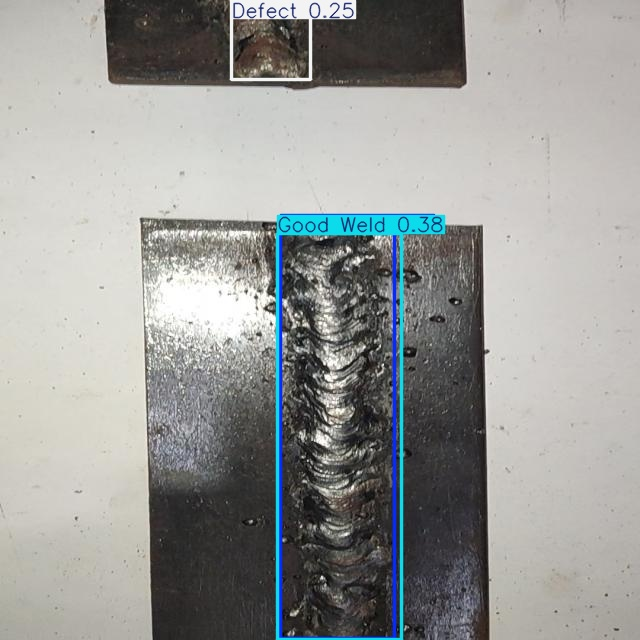

In [ ]:
image_path = "/content/defectos_de_soldaduras/valid/images/SampleV1_1_mp4-24_jpg.rf.8487d87bb4c1d1ab9059da84ac881495.jpg"

results = mi_modelo(image_path)

for result in results:
  result.plot(save=True, filename=os.path.join(save_dir, os.path.basename(result.path)))
  result_image_path = os.path.join(save_dir, os.path.basename(result.path))
  display(Image(filename=result_image_path))

#### 📍 2) Filtrar respuesta

Devolver solo los que tenga un confidence mayor a 30%.


image 1/1 /content/defectos_de_soldaduras/valid/images/SampleV1_1_mp4-24_jpg.rf.8487d87bb4c1d1ab9059da84ac881495.jpg: 640x640 1 Good Weld, 19.0ms
Speed: 5.7ms preprocess, 19.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


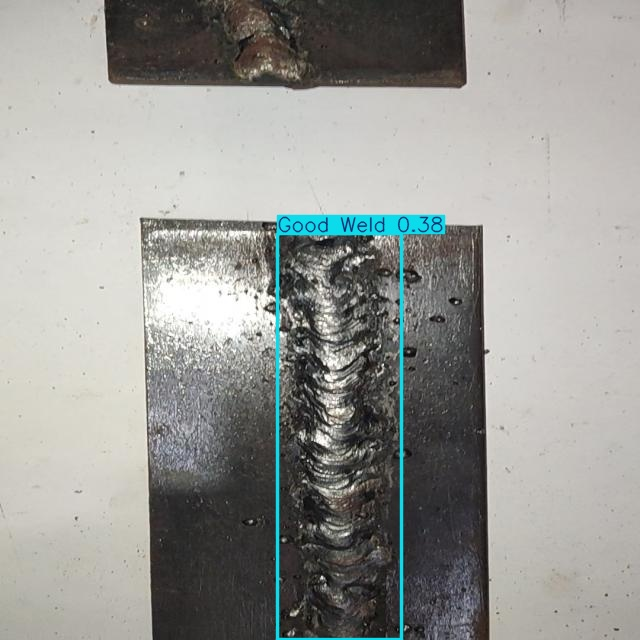

In [ ]:
image_path = "/content/defectos_de_soldaduras/valid/images/SampleV1_1_mp4-24_jpg.rf.8487d87bb4c1d1ab9059da84ac881495.jpg"

results = mi_modelo(
    image_path,
    conf=0.30,
    )

for result in results:
  result.plot(save=True, filename=os.path.join(save_dir, os.path.basename(result.path)))
  result_image_path = os.path.join(save_dir, os.path.basename(result.path))
  display(Image(filename=result_image_path))

Devolver solo los que tenga un confidence mayor a 30% y sea de la clase "Good Weld".


image 1/1 /content/defectos_de_soldaduras/valid/images/SampleV1_1_mp4-24_jpg.rf.8487d87bb4c1d1ab9059da84ac881495.jpg: 640x640 1 Good Weld, 13.6ms
Speed: 3.6ms preprocess, 13.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


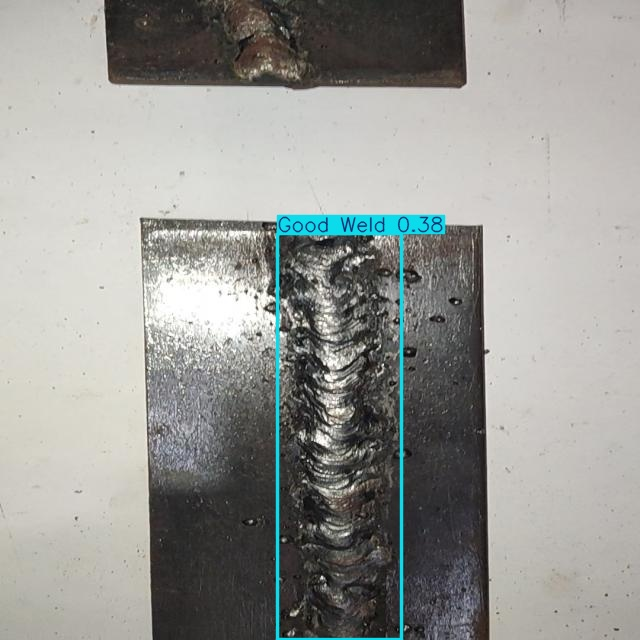

In [ ]:
image_path = "/content/defectos_de_soldaduras/valid/images/SampleV1_1_mp4-24_jpg.rf.8487d87bb4c1d1ab9059da84ac881495.jpg"


results = mi_modelo(
    image_path,
    conf=0.30,
    classes=[1],
    )

for result in results:
  result.plot(save=True, filename=os.path.join(save_dir, os.path.basename(result.path)))
  result_image_path = os.path.join(save_dir, os.path.basename(result.path))
  display(Image(filename=result_image_path))

#### 📍 3) Devolver resultados específicos

In [ ]:
def detectar_objetos(image_path, model):
    """
    Realiza la detección de objetos en una imagen y devuelve:
      - Las cajas delimitadoras (bounding boxes) en formato [x1, y1, x2, y2].
      - Los nombres de las clases detectadas.
      - Los confidences de cada detección.
      - La imagen anotada con las detecciones.

    Parámetros:
      image_path (str): Ruta a la imagen.
      model: Modelo YOLO entrenado.

    Retorna:
      boxes (numpy.ndarray): Arreglo de bounding boxes.
      class_names (list): Lista con los nombres de las clases detectadas.
      confidences (numpy.ndarray): Arreglo con los scores/confidencias.
      annotated_img (numpy.ndarray): Imagen con las detecciones dibujadas.
    """
    # Realiza la detección (para una imagen, results es una lista y tomamos el primer resultado)
    results = model(image_path)
    result = results[0]

    # Extrae las cajas delimitadoras (bounding boxes) en formato xyxy
    boxes = result.boxes.xyxy.cpu().numpy()

    # Extrae los índices de las clases detectadas y las confidencias
    classes_idx = result.boxes.cls.cpu().numpy().astype(int)
    confidences = result.boxes.conf.cpu().numpy()

    # Si el modelo tiene el diccionario de nombres, se obtienen los nombres de las clases
    if hasattr(model, "names"):
        class_names = [model.names[i] for i in classes_idx]
    else:
        class_names = classes_idx  # Si no existe, se retorna los índices de clase

    # Se obtiene la imagen con los bounding boxes ya dibujados
    annotated_img = result.plot()

    return boxes, class_names, confidences, annotated_img

In [ ]:
image_path = "/content/defectos_de_soldaduras/valid/images/SampleV2_1_mp4-26_jpg.rf.a8431cb1acce1c55d32861c982c2a16a.jpg"

boxes, classes, confs, img_anotada = detectar_objetos(image_path, mi_modelo)


image 1/1 /content/defectos_de_soldaduras/valid/images/SampleV2_1_mp4-26_jpg.rf.a8431cb1acce1c55d32861c982c2a16a.jpg: 640x640 3 Good Welds, 15.1ms
Speed: 2.5ms preprocess, 15.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


array([[[ 73,  76,  80],
        [ 72,  75,  79],
        [ 71,  74,  78],
        ...,
        [ 41,  46,  45],
        [ 29,  31,  31],
        [ 20,  22,  22]],

       [[ 73,  76,  80],
        [ 72,  75,  79],
        [ 71,  74,  78],
        ...,
        [ 34,  39,  38],
        [ 28,  30,  30],
        [ 25,  27,  27]],

       [[ 73,  76,  80],
        [ 72,  75,  79],
        [ 71,  74,  78],
        ...,
        [ 24,  29,  28],
        [ 24,  26,  26],
        [ 27,  29,  29]],

       ...,

       [[188, 189, 187],
        [189, 190, 188],
        [189, 190, 188],
        ...,
        [207, 212, 210],
        [208, 213, 211],
        [208, 213, 211]],

       [[190, 191, 189],
        [190, 191, 189],
        [190, 191, 189],
        ...,
        [208, 213, 211],
        [208, 213, 211],
        [209, 214, 212]],

       [[191, 192, 190],
        [190, 191, 189],
        [190, 191, 189],
        ...,
        [208, 213, 211],
        [208, 213, 211],
        [209, 214, 212]]], dtype=uint8)
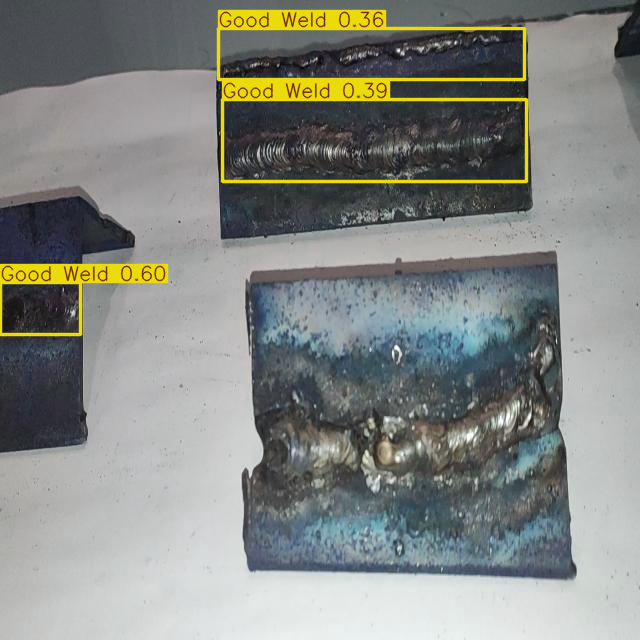

In [ ]:
img_anotada

In [ ]:
print("Bounding Boxes:", boxes)
print("Class Names:", classes)
print("Confidences:", confs)

Bounding Boxes: [[    0.47375      282.95      80.029      334.87]
 [     222.34      99.926      526.19      181.69]
 [     218.48      28.046      524.84      79.177]]
Class Names: ['Good Weld', 'Good Weld', 'Good Weld']
Confidences: [    0.60474     0.39315     0.35915]


### 6) Conclusiones

- Aprender sobre los distintos objetos y métodos que nos ofrece YOLO.

- Realizar el proceso completo de detección de imágenes con YOLO.

<br>
<br>
<br>

---

<br>
<br>


<img src="https://static.platzi.com/media/avatars/platziteam_8cfe6fc7-1246-4c9a-9f5d-d10d467443ee.png" width="100px">

[Platzi](https://platzi.com/) 🚀

